# Sujet 3 : Economique 

In [1]:
#Importer les packages
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt # pour faire des graphiques 


# 1- récupérer GDP ( PIB) 

#Récuperation de URL  de site 

In [2]:
url_GDP= "https://www.macrotrends.net/countries/ranking/gdp-gross-domestic-product" #Récupération de l'Url 
url_GDP 

'https://www.macrotrends.net/countries/ranking/gdp-gross-domestic-product'

In [3]:
soup = BeautifulSoup(requests.get(url_GDP).text, 'html.parser') # Le contenu de la page et un parseur
# et Transformer le texte non compris par python en (format Html) >> structure compris par python 

In [4]:
response = requests.get(url_GDP)

In [5]:
response 

<Response [200]>

In [6]:
Tab_GDP = soup.find_all("table", attrs = {"class": "table table-striped table-hover table-bordered"}) #### les GDP par pays
Tab_GDP # >>Lister toutes les balises 

[<table class="table table-striped table-hover table-bordered" id="country_ranking">
 <thead>
 <tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2018</th>
 <th style="text-align:center;">2017</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:left"><a href="/countries/USA/united-states/gdp-gross-domestic-product">United States</a></td>
 <td style="text-align:right;">$20,580,159,776,000</td>
 <td style="text-align:right;">$19,519,353,692,000</td>
 <td style="text-align:right;">$18,714,960,538,000</td>
 <td style="text-align:right;">$18,224,704,440,000</td>
 <td style="text-align:right;">$17,527,163,695,000</td>
 </tr>
 <tr>
 <td style="text-align:left"><a href="/countries/CHN/china/gdp-gross-domestic-product">China</a></td>
 <td style="text-align:right;">$13,894,817,549,374</td>
 <td style="text-align:right;">$12,310,40

In [7]:
Tab_GDP= soup.find_all("tr") # Récuperer les Balises  de chaque ligne de tableau 
Tab_GDP

[<tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2018</th>
 <th style="text-align:center;">2017</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/USA/united-states/gdp-gross-domestic-product">United States</a></td>
 <td style="text-align:right;">$20,580,159,776,000</td>
 <td style="text-align:right;">$19,519,353,692,000</td>
 <td style="text-align:right;">$18,714,960,538,000</td>
 <td style="text-align:right;">$18,224,704,440,000</td>
 <td style="text-align:right;">$17,527,163,695,000</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/CHN/china/gdp-gross-domestic-product">China</a></td>
 <td style="text-align:right;">$13,894,817,549,374</td>
 <td style="text-align:right;">$12,310,409,370,893</td>
 <td style="text-align:right;">$11,233,276,536,737</td>
 <td style="text-align:right;">$11,061,5

In [8]:
Tab_GDP[0] #la première ligne de tableau

<tr>
<th style="text-align:left;">Country Name</th>
<th style="text-align:center;">2018</th>
<th style="text-align:center;">2017</th>
<th style="text-align:center;">2016</th>
<th style="text-align:center;">2015</th>
<th style="text-align:center;">2014</th>
</tr>

In [9]:
Tab_GDP[0].contents

['\n',
 <th style="text-align:left;">Country Name</th>,
 '\n',
 <th style="text-align:center;">2018</th>,
 '\n',
 <th style="text-align:center;">2017</th>,
 '\n',
 <th style="text-align:center;">2016</th>,
 '\n',
 <th style="text-align:center;">2015</th>,
 '\n',
 <th style="text-align:center;">2014</th>,
 '\n']

In [10]:
Tab_GDP[0].contents[1].text #(.text) pour montrer le nom de notre colonne seulement en éliminant le reste de la balise  

'Country Name'

In [11]:
Tab_GDP[0].contents[3].text  #2018           

'2018'

In [12]:
Tab_GDP[0].contents[5].text  #2017

'2017'

In [13]:
Tab_GDP[0].contents[7].text #2016

'2016'

In [14]:
Tab_GDP[0].contents[9].text #2015

'2015'

In [15]:
Tab_GDP[0].contents[11].text  #2014

'2014'

#Deuxième méthode 

In [16]:
Tab_GDP[0].contents[-2].text   #2014

'2014'

In [17]:
Tab_GDP[0].contents[-4].text   #2015

'2015'

In [18]:
Tab_GDP[0].contents[-6].text  #2016 

'2016'

In [19]:
Tab_GDP[0].contents[-8].text  #2017

'2017'

In [20]:
Tab_GDP[0].contents[-10].text #2018

'2018'

In [21]:
Tab_GDP[1].contents[-2].text  #GDP des Etats Unis en 2014

'$17,527,163,695,000'

In [22]:
Tab_GDP[1].contents[-4].text  #GDP des Etats Unis en 2015

'$18,224,704,440,000'

In [23]:
Tab_GDP[1].contents[-6].text  #GDP des Etats Unis en 2016

'$18,714,960,538,000'

In [24]:
Tab_GDP[1].contents[5].text   #GDP des Etats Unis en 2017

'$19,519,353,692,000'

In [25]:
Tab_GDP[1].contents[-10].text #GDP des Etats Unis en 2018 

'$20,580,159,776,000'

In [26]:
len(Tab_GDP)

207

In [27]:
countries = Tab_GDP[1].contents[1].text 
GDP_2014=Tab_GDP[1].contents[-2].text #2014
GDP_2015=Tab_GDP[1].contents[-4].text #2015
GDP_2016=Tab_GDP[1].contents[-6].text #2016
GDP_2017=Tab_GDP[1].contents[5].text #2017
GDP_2018=Tab_GDP[1].contents[-10].text#2018

#Récupérer les informations Automatiquement >>>>> la boucle for 

In [28]:
liste = []  ##### Automatisation de la récupération d'information

for i in range(0,len(Tab_GDP)): # POur chaque élement de tableau GDP et la fonction ('$','') pour enlever le dollar
    
    GDP_2018 = Tab_GDP[i].contents[-2].text.replace('$','').replace(',','')
    GDP_2018 = int(GDP_2018) ###  GDP en 2014
    GDP_2017= Tab_GDP[i].contents[-4].text.replace('$','').replace(',','')
    GDP_2017 = int(GDP_2017) ###  GDP en 2015
    GDP_2016= Tab_GDP[i].contents[-6].text.replace('$','').replace(',','')
    GDP_2016 = int(GDP_2016) ###  GDP en 2016
    GDP_2015= Tab_GDP[i].contents[5].text.replace('$','').replace(',','')
    GDP_2015 = int(GDP_2015) ###  GDP en 2017
    GDP_2014= Tab_GDP[i].contents[-10].text.replace('$','').replace(',','')
    GDP_2014 = int(GDP_2014) ### GDP en 2018
    country = Tab_GDP[i].contents[1].text ### Nom du pays
    liste.append((country, GDP_2014, GDP_2015, GDP_2016, GDP_2017, GDP_2018 ))




In [29]:
liste #Liste des PIB par pays de 2014 >>>> 2018

[('Country Name', 2018, 2017, 2016, 2015, 2014),
 ('United States',
  20580159776000,
  19519353692000,
  18714960538000,
  18224704440000,
  17527163695000),
 ('China',
  13894817549374,
  12310409370893,
  11233276536737,
  11061553079876,
  10475682920595),
 ('Japan',
  4954806619995,
  4866864409658,
  4922538141455,
  4389475622589,
  4850413536038),
 ('Germany',
  3963767526251,
  3682602479929,
  3467498002104,
  3356235704120,
  3883920155292),
 ('United Kingdom',
  2860667727552,
  2666229179958,
  2694283209613,
  2928591002003,
  3063803240208),
 ('France',
  2787863958885,
  2595151045198,
  2471285607082,
  2438207896252,
  2852165760630),
 ('India',
  2713165057513,
  2652754685835,
  2294797978292,
  2103587817042,
  2039127446299),
 ('Italy',
  2091544955092,
  1961796197354,
  1875797463584,
  1835899237320,
  2159133919744),
 ('Brazil',
  1885482534238,
  2062831045936,
  1795700168991,
  1802214373741,
  2455993625159),
 ('South Korea',
  1724845615629,
  16239014968

In [30]:
GDP = pd.DataFrame(liste, columns = ["country", "GDP_2014", "GDP_2015", "GDP_2016", "GDP_2017", "GDP_2018"]) # pour lister les colonnes de tableau PIB
GDP

,country,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018
0,Country Name,2018,2017,2016,2015,2014
1,United States,20580159776000,19519353692000,18714960538000,18224704440000,17527163695000
2,China,13894817549374,12310409370893,11233276536737,11061553079876,10475682920595
3,Japan,4954806619995,4866864409658,4922538141455,4389475622589,4850413536038
4,Germany,3963767526251,3682602479929,3467498002104,3356235704120,3883920155292
...,...,...,...,...,...,...
202,Tuvalu,42588165,40619252,36547800,35492074,37290608
203,South Sudan,0,0,0,11997800760,13962212847
204,Aruba,0,3056424581,2965921788,2919553073,2765363128
205,Venezuela,0,0,0,0,482359318768


In [31]:
GDP= GDP.iloc[1:,:] #éliminer la première ligne 
GDP

,country,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018
1,United States,20580159776000,19519353692000,18714960538000,18224704440000,17527163695000
2,China,13894817549374,12310409370893,11233276536737,11061553079876,10475682920595
3,Japan,4954806619995,4866864409658,4922538141455,4389475622589,4850413536038
4,Germany,3963767526251,3682602479929,3467498002104,3356235704120,3883920155292
5,United Kingdom,2860667727552,2666229179958,2694283209613,2928591002003,3063803240208
...,...,...,...,...,...,...
202,Tuvalu,42588165,40619252,36547800,35492074,37290608
203,South Sudan,0,0,0,11997800760,13962212847
204,Aruba,0,3056424581,2965921788,2919553073,2765363128
205,Venezuela,0,0,0,0,482359318768


In [32]:
GDP.to_csv("GDP.csv") #### Exporter le tableau  en csv

# 2-récupérer GDP Growth rate /Taux de Croissance

In [33]:
url= 'https://www.macrotrends.net/countries/ranking/gdp-growth-rate'# Récupération l'url des tables de Taux de croissance du PIB 
url

'https://www.macrotrends.net/countries/ranking/gdp-growth-rate'

In [34]:
r = requests.get(url)

In [35]:
r

<Response [200]>

In [36]:
soup = BeautifulSoup(r.text, 'html.parser') # Transformer le texte en format comprise par Python

In [37]:
Growth_rate = soup.find_all('tr')
Growth_rate

[<tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2018</th>
 <th style="text-align:center;">2017</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/LBY/libya/gdp-growth-rate">Libya</a></td>
 <td style="text-align:right;">15.13%</td>
 <td style="text-align:right;">26.68%</td>
 <td style="text-align:right;">-2.80%</td>
 <td style="text-align:right;">-8.86%</td>
 <td style="text-align:right;">-24.00%</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/RWA/rwanda/gdp-growth-rate">Rwanda</a></td>
 <td style="text-align:right;">8.58%</td>
 <td style="text-align:right;">3.98%</td>
 <td style="text-align:right;">5.97%</td>
 <td style="text-align:right;">8.86%</td>
 <td style="text-align:right;">6.17%</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/DJI/djibouti/gdp-growth-rate">Djibo

In [38]:
liste_Growth_rate= []

for i in range(0,len(Growth_rate)): #### POur chaque élement de la Tableau Taux de Coissance
    
  ##### Automatisation de la récupération d'information
    country = Growth_rate[i].contents[1].text.replace('%','') ### Nom du pays
    Growth_rate_2018 = Growth_rate[i].contents[3].text.replace('%','') ###  Taux de Croissance en 2018
    Growth_rate_2017= Growth_rate[i].contents[5].text.replace('%','') ###  Taux de Coissance en 2017
    Growth_rate_2016= Growth_rate[i].contents[7].text.replace('%','') ###  Taux Croissance en 2016
    Growth_rate_2015= Growth_rate[i].contents[9].text.replace('%','')###  Taux de Coissance en 2015
    Growth_rate_2014= Growth_rate[i].contents[11].text.replace('%','') ### Taux de Coissance en 2014
    liste_Growth_rate.append((country, Growth_rate_2014, Growth_rate_2015, Growth_rate_2016, Growth_rate_2017, Growth_rate_2018 ))

In [39]:
liste_Growth_rate #Liste des données Récupérer par la boucle for

[('Country Name', '2014', '2015', '2016', '2017', '2018'),
 ('Libya', '-24.00', '-8.86', '-2.80', '26.68', '15.13'),
 ('Rwanda', '6.17', '8.86', '5.97', '3.98', '8.58'),
 ('Djibouti', '7.06', '7.70', '6.65', '5.40', '8.41'),
 ('Ireland', '8.56', '25.16', '3.68', '8.15', '8.17'),
 ('Maldives', '7.33', '2.88', '6.34', '7.21', '8.13'),
 ('Bangladesh', '6.06', '6.55', '7.11', '7.28', '7.86'),
 ('Cambodia', '7.14', '7.04', '7.03', '6.83', '7.47'),
 ('Antigua And Barbuda', '3.80', '3.83', '5.50', '3.15', '7.39'),
 ('Tajikistan', '6.71', '6.01', '6.87', '7.62', '7.30'),
 ('Mongolia', '7.89', '2.38', '1.17', '5.34', '7.25'),
 ('Gambia', '-1.41', '4.06', '1.94', '4.82', '7.23'),
 ('Niger', '6.64', '4.39', '5.71', '5.00', '7.22'),
 ('Vietnam', '5.98', '6.68', '6.21', '6.81', '7.08'),
 ('Dominican Republic', '7.05', '6.93', '6.66', '4.67', '6.98'),
 ('Ethiopia', '10.26', '10.39', '9.43', '9.56', '6.82'),
 ('Myanmar', '7.99', '6.99', '5.75', '6.41', '6.75'),
 ('China', '7.43', '7.04', '6.85', '6.9

In [40]:
GROWTH_rate = pd.DataFrame(liste_Growth_rate, columns = ["country", "Growth_rate_2014", "Growth_rate_2015", "Growth_rate_2016", "Growth_rate_2017", "Growth_rate_2018"])
GROWTH_rate #Récupération de la DataFrame de taux de croissance sur 5 ans 

,country,Growth_rate_2014,Growth_rate_2015,Growth_rate_2016,Growth_rate_2017,Growth_rate_2018
0,Country Name,2014,2015,2016,2017,2018
1,Libya,-24.00,-8.86,-2.80,26.68,15.13
2,Rwanda,6.17,8.86,5.97,3.98,8.58
3,Djibouti,7.06,7.70,6.65,5.40,8.41
4,Ireland,8.56,25.16,3.68,8.15,8.17
...,...,...,...,...,...,...
200,Northern Mariana Islands,3.79,3.52,28.31,25.57,-19.61
201,Virgin Islands (U.S.),-0.87,0.19,0.90,-1.70,0.00
202,South Sudan,3.37,-10.79,0.00,0.00,0.00
203,Aruba,0.30,5.70,2.10,2.00,0.00


In [41]:
GROWTH_rate= GROWTH_rate .iloc[1:,:] #éliminer la 1 er ligne
GROWTH_rate 

,country,Growth_rate_2014,Growth_rate_2015,Growth_rate_2016,Growth_rate_2017,Growth_rate_2018
1,Libya,-24.00,-8.86,-2.80,26.68,15.13
2,Rwanda,6.17,8.86,5.97,3.98,8.58
3,Djibouti,7.06,7.70,6.65,5.40,8.41
4,Ireland,8.56,25.16,3.68,8.15,8.17
5,Maldives,7.33,2.88,6.34,7.21,8.13
...,...,...,...,...,...,...
200,Northern Mariana Islands,3.79,3.52,28.31,25.57,-19.61
201,Virgin Islands (U.S.),-0.87,0.19,0.90,-1.70,0.00
202,South Sudan,3.37,-10.79,0.00,0.00,0.00
203,Aruba,0.30,5.70,2.10,2.00,0.00


In [42]:
GROWTH_rate.to_csv("GROWTH_rate.csv") # #### Exporter le tableau  en csv


In [43]:
#Fusionner les deux datasets  

In [44]:
GDP = GDP.merge(GROWTH_rate, how='left', on='country') #Fusionner deux DataFrame (GDP & Taux de Croissance )
GDP

,country,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018,Growth_rate_2014,Growth_rate_2015,Growth_rate_2016,Growth_rate_2017,Growth_rate_2018
0,United States,20580159776000,19519353692000,18714960538000,18224704440000,17527163695000,2.53,2.91,1.64,2.37,2.93
1,China,13894817549374,12310409370893,11233276536737,11061553079876,10475682920595,7.43,7.04,6.85,6.95,6.75
2,Japan,4954806619995,4866864409658,4922538141455,4389475622589,4850413536038,0.37,1.22,0.52,2.17,0.32
3,Germany,3963767526251,3682602479929,3467498002104,3356235704120,3883920155292,2.21,1.49,2.23,2.60,1.27
4,United Kingdom,2860667727552,2666229179958,2694283209613,2928591002003,3063803240208,2.61,2.36,1.92,1.89,1.34
...,...,...,...,...,...,...,...,...,...,...,...
201,Tuvalu,42588165,40619252,36547800,35492074,37290608,1.35,9.14,3.03,4.09,2.50
202,South Sudan,0,0,0,11997800760,13962212847,3.37,-10.79,0.00,0.00,0.00
203,Aruba,0,3056424581,2965921788,2919553073,2765363128,0.30,5.70,2.10,2.00,0.00
204,Venezuela,0,0,0,0,482359318768,-3.89,0.00,0.00,0.00,0.00


# 3-récupérer GDP par Capital / PIB par Capital 

In [45]:
url_GDP_par_Capital  ="https://www.macrotrends.net/countries/ranking/gdp-per-capita" #récupérer url de GDP par Capital
url_GDP_par_Capital 

'https://www.macrotrends.net/countries/ranking/gdp-per-capita'

In [46]:
soup = BeautifulSoup(requests.get(url_GDP_par_Capital).text,'html.parser')  #pour que Python comprends qu'il s'agit bien d'un HTM

In [47]:
response = requests.get(url_GDP_par_Capital)

In [48]:
response 

<Response [200]>

In [49]:
Tab_GDP_par_Capital = soup.find_all("table", attrs = {"class": "table table-striped table-hover table-bordered"}) 
#Tab_GDP_par_Capital

In [50]:
GDP_par_Capital= soup.find_all("tr") # Récuperer les Balises  de chaque ligne de tableau de PIB par Capital
#GDP_par_Capital

In [51]:
GDP_par_Capital= soup.find_all("tr")
GDP_par_Capital

[<tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2018</th>
 <th style="text-align:center;">2017</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/MCO/monaco/gdp-per-capita">Monaco</a></td>
 <td style="text-align:right;">$185,829</td>
 <td style="text-align:right;">$167,517</td>
 <td style="text-align:right;">$170,029</td>
 <td style="text-align:right;">$166,012</td>
 <td style="text-align:right;">$189,422</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/LIE/liechtenstein/gdp-per-capita">Liechtenstein</a></td>
 <td style="text-align:right;">$181,403</td>
 <td style="text-align:right;">$173,356</td>
 <td style="text-align:right;">$165,629</td>
 <td style="text-align:right;">$167,291</td>
 <td style="text-align:right;">$178,846</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countri

In [52]:
GDP_par_Capital[0] #la première ligne de tableau

<tr>
<th style="text-align:left;">Country Name</th>
<th style="text-align:center;">2018</th>
<th style="text-align:center;">2017</th>
<th style="text-align:center;">2016</th>
<th style="text-align:center;">2015</th>
<th style="text-align:center;">2014</th>
</tr>

In [53]:
GDP_par_Capital[0].contents

['\n',
 <th style="text-align:left;">Country Name</th>,
 '\n',
 <th style="text-align:center;">2018</th>,
 '\n',
 <th style="text-align:center;">2017</th>,
 '\n',
 <th style="text-align:center;">2016</th>,
 '\n',
 <th style="text-align:center;">2015</th>,
 '\n',
 <th style="text-align:center;">2014</th>,
 '\n']

In [54]:
GDP_par_Capital[0].contents[1].text # Récupération le nom de Pays de Tableau

'Country Name'

In [55]:
GDP_par_Capital[0].contents[-2].text # 2014

'2014'

In [56]:
GDP_par_Capital[0].contents[-4].text #2015

'2015'

In [57]:
GDP_par_Capital[0].contents[-6].text # 2016

'2016'

In [58]:
GDP_par_Capital[0].contents[-8].text #2017

'2017'

In [59]:
GDP_par_Capital[0].contents[-10].text #2018

'2018'

In [60]:
GDP_par_Capital[1].contents[1].text # #Récupération de Monaco de tableau

'Monaco'

In [61]:
GDP_par_Capital [1].contents[3].text #GDP par Capital  de Monaco en 2018

'$185,829'

In [62]:
GDP_par_Capital [1].contents[5].text #GDP par Capital  de Monaco en 2017

'$167,517'

In [63]:
GDP_par_Capital [1].contents[-6].text #GDP par Capital de Monaco en 2016

'$170,029'

In [64]:
GDP_par_Capital [1].contents[-4].text #GDP par Capital de Monaco en 2015

'$166,012'

In [65]:
GDP_par_Capital [1].contents[11].text #GDP par Capital  de Monaco en 2014

'$189,422'

In [66]:
countries = GDP_par_Capital[1].contents[1].text 
GDP_par_Capital_2014 = GDP_par_Capital[0].contents[-2].text #2014
GDP_par_Capital_2015 = GDP_par_Capital[0].contents[-4].text #2015
GDP_par_Capital_2016 = GDP_par_Capital[0].contents[-6].text #2016
GDP_par_Capital_2017 = GDP_par_Capital[0].contents[-8].text #2017
GDP_par_Capital_2018 = GDP_par_Capital[0].contents[-10].text #2018

In [67]:
liste = []

for i in range(0,len(GDP_par_Capital)): #### POur chaque élement de 0 à 207 - 1 ( 207 pays)
    
  ##### Automatisation de la récupération d'information
    GDP_par_Capital_2014 = GDP_par_Capital[i].contents[-2].text.replace('$','').replace(',','')
    GDP_par_Capital_2014 = int(GDP_par_Capital_2014) ###  GDP en 2014
    GDP_par_Capital_2015 = GDP_par_Capital[i].contents[-4].text.replace('$','').replace(',','')
    GDP_par_Capital_2015 = int(GDP_par_Capital_2015) ###  GDP en 2015
    GDP_par_Capital_2016 = GDP_par_Capital[i].contents[-6].text.replace('$','').replace(',','')
    GDP_par_Capital_2016 = int(GDP_par_Capital_2016) ###  GDP en 2016
    GDP_par_Capital_2017 = GDP_par_Capital[i].contents[5].text.replace('$','').replace(',','')
    GDP_par_Capital_2017 = int(GDP_par_Capital_2017) ###  GDP en 2017
    GDP_par_Capital_2018 = GDP_par_Capital[i].contents[-10].text.replace('$','').replace(',','')
    GDP_par_Capital_2018 = int(GDP_par_Capital_2018) ### GDP en 2018
    country = GDP_par_Capital[i].contents[1].text ### Nom du pays
    liste.append((country, GDP_par_Capital_2014, GDP_par_Capital_2015, GDP_par_Capital_2016, GDP_par_Capital_2017, GDP_par_Capital_2018))

In [68]:
liste #Liste des données Récupérer par la boucle for 

[('Country Name', 2014, 2015, 2016, 2017, 2018),
 ('Monaco', 189422, 166012, 170029, 167517, 185829),
 ('Liechtenstein', 178846, 167291, 165629, 173356, 181403),
 ('Luxembourg', 118824, 101376, 104278, 107627, 116654),
 ('Bermuda', 98468, 102006, 106886, 111821, 113021),
 ('Isle Of Man', 92335, 85125, 82206, 83490, 89108),
 ('Macao', 93777, 75341, 74061, 81517, 87209),
 ('Cayman Islands', 74990, 76280, 78465, 81302, 85975),
 ('Switzerland', 86606, 82082, 80172, 80450, 82818),
 ('Norway', 97019, 74356, 70459, 75497, 81734),
 ('Ireland', 55493, 61995, 63197, 69822, 78621),
 ('Iceland', 54242, 52564, 61467, 71311, 72969),
 ('Singapore', 57563, 55647, 56828, 60914, 66189),
 ('Qatar', 83858, 63039, 57163, 59125, 65908),
 ('Faroe Islands', 59440, 52405, 56854, 60108, 64270),
 ('United States', 55065, 56839, 57952, 60062, 62996),
 ('Denmark', 62549, 53255, 54664, 57610, 61599),
 ('Australia', 62511, 56756, 49971, 54028, 57355),
 ('Sweden', 60020, 51545, 51965, 53792, 54589),
 ('Greenland', 50

In [69]:
GDP_par_Capital = pd.DataFrame(liste, columns = ["country", "GDP_par_Cap2014", "GDP_par_Cap2015", "GDP_par_Cap2016", "GDP_par_Cap2017", "GDP_par_Cap2018"])
GDP_par_Capital #Récupérer la DataFrame de GDP par Capital 

,country,GDP_par_Cap2014,GDP_par_Cap2015,GDP_par_Cap2016,GDP_par_Cap2017,GDP_par_Cap2018
0,Country Name,2014,2015,2016,2017,2018
1,Monaco,189422,166012,170029,167517,185829
2,Liechtenstein,178846,167291,165629,173356,181403
3,Luxembourg,118824,101376,104278,107627,116654
4,Bermuda,98468,102006,106886,111821,113021
...,...,...,...,...,...,...
202,Burundi,275,306,282,293,272
203,Aruba,26648,27981,28281,29008,0
204,Venezuela,16054,0,0,0,0
205,Virgin Islands (U.S.),33573,34797,35932,35938,0


In [70]:
GDP_par_Capital  =  GDP_par_Capital.iloc[1:,:]
GDP_par_Capital #Eliminer la  première Ligne  en utilisant la fonction Iloc 

,country,GDP_par_Cap2014,GDP_par_Cap2015,GDP_par_Cap2016,GDP_par_Cap2017,GDP_par_Cap2018
1,Monaco,189422,166012,170029,167517,185829
2,Liechtenstein,178846,167291,165629,173356,181403
3,Luxembourg,118824,101376,104278,107627,116654
4,Bermuda,98468,102006,106886,111821,113021
5,Isle Of Man,92335,85125,82206,83490,89108
...,...,...,...,...,...,...
202,Burundi,275,306,282,293,272
203,Aruba,26648,27981,28281,29008,0
204,Venezuela,16054,0,0,0,0
205,Virgin Islands (U.S.),33573,34797,35932,35938,0


In [71]:
GDP_par_Capital .to_csv("GDP_par_Capital .csv") # Exporter le tableau  en csv

In [72]:
GDP = GDP.merge(GDP_par_Capital, how='left', on='country') #Fusionner deux DataFrame
GDP

,country,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018,Growth_rate_2014,Growth_rate_2015,Growth_rate_2016,Growth_rate_2017,Growth_rate_2018,GDP_par_Cap2014,GDP_par_Cap2015,GDP_par_Cap2016,GDP_par_Cap2017,GDP_par_Cap2018
0,United States,20580159776000,19519353692000,18714960538000,18224704440000,17527163695000,2.53,2.91,1.64,2.37,2.93,55065,56839,57952,60062,62996
1,China,13894817549374,12310409370893,11233276536737,11061553079876,10475682920595,7.43,7.04,6.85,6.95,6.75,7679,8067,8148,8879,9977
2,Japan,4954806619995,4866864409658,4922538141455,4389475622589,4850413536038,0.37,1.22,0.52,2.17,0.32,38109,34524,38762,38387,39159
3,Germany,3963767526251,3682602479929,3467498002104,3356235704120,3883920155292,2.21,1.49,2.23,2.60,1.27,47960,41087,42108,44553,47811
4,United Kingdom,2860667727552,2666229179958,2694283209613,2928591002003,3063803240208,2.61,2.36,1.92,1.89,1.34,47426,44975,41064,40361,43043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Tuvalu,42588165,40619252,36547800,35492074,37290608,1.35,9.14,3.03,4.09,2.50,3399,3198,3256,3572,3701
202,South Sudan,0,0,0,11997800760,13962212847,3.37,-10.79,0.00,0.00,0.00,1323,1120,0,0,0
203,Aruba,0,3056424581,2965921788,2919553073,2765363128,0.30,5.70,2.10,2.00,0.00,26648,27981,28281,29008,0
204,Venezuela,0,0,0,0,482359318768,-3.89,0.00,0.00,0.00,0.00,16054,0,0,0,0


# 4-Debt To GDP/ Dette au PIB

In [73]:
url_Debt_to_GDP="https://www.macrotrends.net/countries/ranking/debt-to-gdp-ratio" # Récupérer l'url de tableau Dette / PIB 
url_Debt_to_GDP

'https://www.macrotrends.net/countries/ranking/debt-to-gdp-ratio'

In [74]:
soup = BeautifulSoup(requests.get(url_Debt_to_GDP).text, 'html.parser')

In [75]:
response = requests.get(url_Debt_to_GDP)

In [76]:
response

<Response [200]>

In [77]:
Debt_to_GDP = soup.find_all("table", attrs = {"class": "table table-striped table-hover table-bordered"}) 
Debt_to_GDP

[<table class="table table-striped table-hover table-bordered" id="country_ranking">
 <thead>
 <tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 <th style="text-align:center;">2013</th>
 <th style="text-align:center;">2012</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:left"><a href="/countries/JPN/japan/debt-to-gdp-ratio">Japan</a></td>
 <td style="text-align:right;">196.58%</td>
 <td style="text-align:right;">197.28%</td>
 <td style="text-align:right;">194.43%</td>
 <td style="text-align:right;">188.88%</td>
 <td style="text-align:right;">186.03%</td>
 </tr>
 <tr>
 <td style="text-align:left"><a href="/countries/JAM/jamaica/debt-to-gdp-ratio">Jamaica</a></td>
 <td style="text-align:right;">122.67%</td>
 <td style="text-align:right;">124.66%</td>
 <td style="text-align:right;">132.43%</td>
 <td style="text-align:right;">135.90%</td>
 <td style=

In [78]:
Debt_to_GDP= soup.find_all("tr") # Récuperer les Balises  de chaque ligne de tableau 
Debt_to_GDP

[<tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 <th style="text-align:center;">2013</th>
 <th style="text-align:center;">2012</th>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/JPN/japan/debt-to-gdp-ratio">Japan</a></td>
 <td style="text-align:right;">196.58%</td>
 <td style="text-align:right;">197.28%</td>
 <td style="text-align:right;">194.43%</td>
 <td style="text-align:right;">188.88%</td>
 <td style="text-align:right;">186.03%</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/JAM/jamaica/debt-to-gdp-ratio">Jamaica</a></td>
 <td style="text-align:right;">122.67%</td>
 <td style="text-align:right;">124.66%</td>
 <td style="text-align:right;">132.43%</td>
 <td style="text-align:right;">135.90%</td>
 <td style="text-align:right;">137.93%</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/GBR/united-king

In [79]:
Debt_to_GDP[0]

<tr>
<th style="text-align:left;">Country Name</th>
<th style="text-align:center;">2016</th>
<th style="text-align:center;">2015</th>
<th style="text-align:center;">2014</th>
<th style="text-align:center;">2013</th>
<th style="text-align:center;">2012</th>
</tr>

In [80]:
Debt_to_GDP[0].contents[1].text #Récuperer le NOM de Pays 

'Country Name'

In [81]:
Debt_to_GDP[0].contents[-2].text #2012

'2012'

In [82]:
Debt_to_GDP[0].contents[-4].text #2013

'2013'

In [83]:
Debt_to_GDP[0].contents[-6].text  #2014         

'2014'

In [84]:
Debt_to_GDP[0].contents[5].text  #2015

'2015'

In [85]:
Debt_to_GDP[0].contents[3].text  #2016

'2016'

In [86]:
Debt_to_GDP[1].contents[1].text #Récepuration Japon de la première ligne des pays 

'Japan'

In [87]:
Debt_to_GDP[1].contents[-2].text # Dette au PIB  de Japon en 2012

'186.03%'

In [88]:
Debt_to_GDP[1].contents[-4].text # Dette au PIB de Japon en 2013

'188.88%'

In [89]:
Debt_to_GDP[1].contents[-6].text # Dette au PIB de Japon en 2014

'194.43%'

In [90]:
Debt_to_GDP[1].contents[5].text # Dette au PIB de Japon en 2015

'197.28%'

In [91]:
Debt_to_GDP[1].contents[3].text # Dette au PIB de Japon en 2016

'196.58%'

In [92]:
len(Debt_to_GDP) 

62

In [93]:
liste = []

for i in range(0,len(Debt_to_GDP)): 
    
    #la récupération d'informations d'une manière automatique 
    Debt_to_GDP_2012 = Debt_to_GDP[i].contents[-2].text.replace('%','')
    Debt_to_GDP_2012 = float(Debt_to_GDP_2012) #Dette /PIB en 2012
    Debt_to_GDP_2013= Debt_to_GDP[i].contents[-4].text.replace('%','')
    Debt_to_GDP_2013 = float(Debt_to_GDP_2013) # Dette /PIB en2013
    Debt_to_GDP_2014=Debt_to_GDP[i].contents[-6].text.replace('%','')
    Debt_to_GDP_2014 = float(Debt_to_GDP_2014) # Dette /PIB en2014
    Debt_to_GDP_2015=Debt_to_GDP[i].contents[5].text.replace('%','')
    Debt_to_GDP_2015 = float(Debt_to_GDP_2015) # Dette /PIB en 2015
    Debt_to_GDP_2016= Debt_to_GDP[i].contents[3].text.replace('%','')
    Debt_to_GDP_2016 = float(Debt_to_GDP_2016) #Dette /PIB en 2016
    country = Debt_to_GDP[i].contents[1].text ### Nom du pays
    liste.append((country, Debt_to_GDP_2012 , Debt_to_GDP_2013, Debt_to_GDP_2014, Debt_to_GDP_2015,Debt_to_GDP_2016))

In [94]:
liste #les données récupéré par la boucle for 

[('Country Name', 2012.0, 2013.0, 2014.0, 2015.0, 2016.0),
 ('Japan', 186.03, 188.88, 194.43, 197.28, 196.58),
 ('Jamaica', 137.93, 135.9, 132.43, 124.66, 122.67),
 ('United Kingdom', 99.25, 95.14, 106.21, 105.16, 114.97),
 ('Bhutan', 74.24, 98.44, 93.11, 93.97, 110.68),
 ('Singapore', 107.83, 99.45, 99.61, 103.32, 109.2),
 ('Spain', 84.58, 99.92, 112.21, 104.74, 104.57),
 ('United States', 94.16, 96.08, 96.34, 96.82, 98.98),
 ('Hungary', 93.41, 93.96, 97.72, 95.31, 95.47),
 ('Ireland', 130.08, 131.58, 121.29, 88.52, 84.83),
 ('Albania', 63.67, 70.58, 73.32, 79.86, 80.74),
 ('Jordan', 65.35, 73.72, 77.71, 0.0, 74.07),
 ('Iceland', 108.47, 0.0, 0.0, 0.0, 73.53),
 ('Brazil', 59.85, 57.23, 58.46, 67.54, 73.42),
 ('Ukraine', 33.7, 37.03, 63.67, 70.26, 71.81),
 ('Palau', 27.27, 23.22, 21.88, 63.46, 68.7),
 ('Kyrgyz Republic', 0.0, 0.0, 53.89, 72.46, 60.47),
 ('Colombia', 65.23, 67.1, 79.68, 66.67, 57.41),
 ('San Marino', 51.22, 54.02, 0.0, 56.93, 57.33),
 ('Malawi', 41.42, 36.26, 40.63, 39.

In [95]:
Debt_to_GDP = pd.DataFrame(liste, columns = ["country", "Debt_to_GDP_2012", "Debt_to_GDP_2013", "Debt_to_GDP_2014", "Debt_to_GDP_2015", "Debt_to_GDP_2016"])
Debt_to_GDP #Récupération de  la DataFrame de Debt_to_GDP 

,country,Debt_to_GDP_2012,Debt_to_GDP_2013,Debt_to_GDP_2014,Debt_to_GDP_2015,Debt_to_GDP_2016
0,Country Name,2012.00,2013.00,2014.00,2015.00,2016.00
1,Japan,186.03,188.88,194.43,197.28,196.58
2,Jamaica,137.93,135.90,132.43,124.66,122.67
3,United Kingdom,99.25,95.14,106.21,105.16,114.97
4,Bhutan,74.24,98.44,93.11,93.97,110.68
...,...,...,...,...,...,...
57,India,50.68,50.31,0.00,0.00,0.00
58,Philippines,49.16,47.14,43.43,0.00,0.00
59,Seychelles,78.14,51.55,68.84,63.34,0.00
60,Tunisia,44.66,0.00,0.00,0.00,0.00


In [96]:
Debt_to_GDP =  Debt_to_GDP.iloc[1:,:] 
Debt_to_GDP  #Eliminer la première ligne en utilisant la focntion iloc

,country,Debt_to_GDP_2012,Debt_to_GDP_2013,Debt_to_GDP_2014,Debt_to_GDP_2015,Debt_to_GDP_2016
1,Japan,186.03,188.88,194.43,197.28,196.58
2,Jamaica,137.93,135.90,132.43,124.66,122.67
3,United Kingdom,99.25,95.14,106.21,105.16,114.97
4,Bhutan,74.24,98.44,93.11,93.97,110.68
5,Singapore,107.83,99.45,99.61,103.32,109.20
...,...,...,...,...,...,...
57,India,50.68,50.31,0.00,0.00,0.00
58,Philippines,49.16,47.14,43.43,0.00,0.00
59,Seychelles,78.14,51.55,68.84,63.34,0.00
60,Tunisia,44.66,0.00,0.00,0.00,0.00


In [97]:
Debt_to_GDP.to_csv("Debt_to_GDP.csv") # #### Export le tableau  en csv


In [98]:
#fusionner deux tableaux 
GDP = GDP.merge(Debt_to_GDP, how='left', on='country') #Fusionner deux Dataframe par la fonction merge
GDP

,country,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018,Growth_rate_2014,Growth_rate_2015,Growth_rate_2016,Growth_rate_2017,...,GDP_par_Cap2014,GDP_par_Cap2015,GDP_par_Cap2016,GDP_par_Cap2017,GDP_par_Cap2018,Debt_to_GDP_2012,Debt_to_GDP_2013,Debt_to_GDP_2014,Debt_to_GDP_2015,Debt_to_GDP_2016
0,United States,20580159776000,19519353692000,18714960538000,18224704440000,17527163695000,2.53,2.91,1.64,2.37,...,55065,56839,57952,60062,62996,94.16,96.08,96.34,96.82,98.98
1,China,13894817549374,12310409370893,11233276536737,11061553079876,10475682920595,7.43,7.04,6.85,6.95,...,7679,8067,8148,8879,9977,NaN,NaN,NaN,NaN,NaN
2,Japan,4954806619995,4866864409658,4922538141455,4389475622589,4850413536038,0.37,1.22,0.52,2.17,...,38109,34524,38762,38387,39159,186.03,188.88,194.43,197.28,196.58
3,Germany,3963767526251,3682602479929,3467498002104,3356235704120,3883920155292,2.21,1.49,2.23,2.60,...,47960,41087,42108,44553,47811,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,2860667727552,2666229179958,2694283209613,2928591002003,3063803240208,2.61,2.36,1.92,1.89,...,47426,44975,41064,40361,43043,99.25,95.14,106.21,105.16,114.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Tuvalu,42588165,40619252,36547800,35492074,37290608,1.35,9.14,3.03,4.09,...,3399,3198,3256,3572,3701,NaN,NaN,NaN,NaN,NaN
202,South Sudan,0,0,0,11997800760,13962212847,3.37,-10.79,0.00,0.00,...,1323,1120,0,0,0,NaN,NaN,NaN,NaN,NaN
203,Aruba,0,3056424581,2965921788,2919553073,2765363128,0.30,5.70,2.10,2.00,...,26648,27981,28281,29008,0,NaN,NaN,NaN,NaN,NaN
204,Venezuela,0,0,0,0,482359318768,-3.89,0.00,0.00,0.00,...,16054,0,0,0,0,NaN,NaN,NaN,NaN,NaN


# 5-Récupérer Inflation Rate / Taux d'inflation 

In [99]:
Url_inflation_Rate ="https://www.macrotrends.net/countries/ranking/inflation-rate-cpi" #Récupération Url 
Url_inflation_Rate

'https://www.macrotrends.net/countries/ranking/inflation-rate-cpi'

In [100]:
soup = BeautifulSoup(requests.get(Url_inflation_Rate).text, 'html.parser')
response = requests.get(Url_inflation_Rate)

In [101]:
response

<Response [200]>

In [102]:
inflation_Rate = soup.find_all("table", attrs = {"class": "table table-striped table-hover table-bordered"}) 
inflation_Rate

[<table class="table table-striped table-hover table-bordered" id="country_ranking">
 <thead>
 <tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2018</th>
 <th style="text-align:center;">2017</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:left"><a href="/countries/SDN/sudan/inflation-rate-cpi">Sudan</a></td>
 <td style="text-align:right;">63.29%</td>
 <td style="text-align:right;">32.35%</td>
 <td style="text-align:right;">17.75%</td>
 <td style="text-align:right;">16.91%</td>
 <td style="text-align:right;">36.91%</td>
 </tr>
 <tr>
 <td style="text-align:left"><a href="/countries/LBR/liberia/inflation-rate-cpi">Liberia</a></td>
 <td style="text-align:right;">23.56%</td>
 <td style="text-align:right;">12.42%</td>
 <td style="text-align:right;">8.83%</td>
 <td style="text-align:right;">7.75%</td>
 <td style="text-ali

In [103]:
inflation_Rate = soup.find_all("tr") # Récuperer les Balises  de chaque ligne de tableau 
inflation_Rate

[<tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2018</th>
 <th style="text-align:center;">2017</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/SDN/sudan/inflation-rate-cpi">Sudan</a></td>
 <td style="text-align:right;">63.29%</td>
 <td style="text-align:right;">32.35%</td>
 <td style="text-align:right;">17.75%</td>
 <td style="text-align:right;">16.91%</td>
 <td style="text-align:right;">36.91%</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/LBR/liberia/inflation-rate-cpi">Liberia</a></td>
 <td style="text-align:right;">23.56%</td>
 <td style="text-align:right;">12.42%</td>
 <td style="text-align:right;">8.83%</td>
 <td style="text-align:right;">7.75%</td>
 <td style="text-align:right;">9.86%</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/IRN/iran/inflation-rate-cp

In [104]:
inflation_Rate [0]#la première ligne de tableau

<tr>
<th style="text-align:left;">Country Name</th>
<th style="text-align:center;">2018</th>
<th style="text-align:center;">2017</th>
<th style="text-align:center;">2016</th>
<th style="text-align:center;">2015</th>
<th style="text-align:center;">2014</th>
</tr>

In [105]:
inflation_Rate[0].contents

['\n',
 <th style="text-align:left;">Country Name</th>,
 '\n',
 <th style="text-align:center;">2018</th>,
 '\n',
 <th style="text-align:center;">2017</th>,
 '\n',
 <th style="text-align:center;">2016</th>,
 '\n',
 <th style="text-align:center;">2015</th>,
 '\n',
 <th style="text-align:center;">2014</th>,
 '\n']

In [106]:
inflation_Rate[0].contents[1].text #Récupération le Nom des Pays 

'Country Name'

In [107]:
inflation_Rate[0].contents[-2].text #2014

'2014'

In [108]:
inflation_Rate[0].contents[-4].text #2015

'2015'

In [109]:
inflation_Rate[0].contents[-6].text #2016

'2016'

In [110]:
inflation_Rate[0].contents[5].text #2017

'2017'

In [111]:
inflation_Rate[0].contents[3].text #2018

'2018'

In [112]:
inflation_Rate[1].contents[-2].text #Taux Inflation du sudan en 2014

'36.91%'

In [113]:
inflation_Rate[1].contents[-4].text #Taux Inflation du sudan en 2015

'16.91%'

In [114]:
inflation_Rate[1].contents[-6].text #Taux Inflation du sudan en 2016

'17.75%'

In [115]:
inflation_Rate[1].contents[5].text  #Taux Inflation du sudan en 2017

'32.35%'

In [116]:
inflation_Rate[1].contents[3].text  #Taux Inflation du sudan en 2018

'63.29%'

In [117]:
len(inflation_Rate)

181

In [118]:
liste = []

for i in range(0,len(inflation_Rate)): 
    #la récupération d'informations d'une manière automatique 
    inflation_Rate_2014= inflation_Rate[i].contents[-2].text.replace('%','')
    inflation_Rate_2014 = float(inflation_Rate_2014)  #Taux d'inflation en 2014
    inflation_Rate_2015= inflation_Rate[i].contents[-4].text.replace('%','')
    inflation_Rate_2015 = float(inflation_Rate_2015) # Taux d'inflation en 2015
    inflation_Rate_2016= inflation_Rate[i].contents[-6].text.replace('%','')
    inflation_Rate_2016 = float(inflation_Rate_2016) #Taux d'inflation en 2016
    inflation_Rate_2017= inflation_Rate[i].contents[5].text.replace('%','')
    inflation_Rate_2017 = float(inflation_Rate_2017) # Taux d'inflation en en 2017
    inflation_Rate_2018= inflation_Rate[i].contents[3].text.replace('%','')
    inflation_Rate_2018 = float(inflation_Rate_2018) #Taux d'inflation en  en 2018
    country = inflation_Rate[i].contents[1].text ### Nom du pays
    liste.append((country,inflation_Rate_2014,inflation_Rate_2015,inflation_Rate_2016,inflation_Rate_2017,inflation_Rate_2018,))

In [119]:
liste #liste des données récupéré par la boucle for

[('Country Name', 2014.0, 2015.0, 2016.0, 2017.0, 2018.0),
 ('Sudan', 36.91, 16.91, 17.75, 32.35, 63.29),
 ('Liberia', 9.86, 7.75, 8.83, 12.42, 23.56),
 ('Iran', 16.61, 12.48, 7.25, 8.04, 18.01),
 ('Turkey', 8.85, 7.67, 7.78, 11.14, 16.33),
 ('Sierra Leone', 4.65, 6.69, 10.88, 18.22, 16.03),
 ('Egypt', 10.07, 10.37, 13.81, 29.51, 14.4),
 ('Ethiopia', 6.89, 9.57, 6.63, 10.68, 13.83),
 ('Haiti', 3.44, 6.73, 11.5, 10.68, 12.48),
 ('Malawi', 23.79, 21.87, 21.71, 11.54, 12.42),
 ('Nigeria', 8.06, 9.01, 15.68, 16.52, 12.09),
 ('Ukraine', 12.07, 48.7, 13.91, 14.44, 10.95),
 ('Guinea', 7.07, 10.82, 8.17, 8.91, 9.83),
 ('Madagascar', 6.08, 7.4, 6.04, 8.61, 8.59),
 ('Sao Tome And Principe', 7.0, 5.25, 5.43, 5.7, 7.86),
 ('Ghana', 15.49, 17.15, 17.45, 12.37, 7.81),
 ('Uruguay', 8.88, 8.67, 9.64, 6.22, 7.61),
 ('Zambia', 7.81, 10.11, 17.87, 6.58, 7.49),
 ('Tunisia', 4.63, 4.44, 3.63, 5.31, 7.31),
 ('Myanmar', 4.95, 9.45, 6.93, 4.57, 6.87),
 ('Mongolia', 12.25, 5.73, 0.74, 4.31, 6.81),
 ('Gambia', 

In [120]:
inflation_Rate= pd.DataFrame(liste, columns = ["country", "inflation_Rate_2014", "inflation_Rate_2015", "inflation_Rate_2016", "inflation_Rate_2017", "inflation_Rate_2018"])
inflation_Rate #Récupération de DataFrame de taux d'inflation

,country,inflation_Rate_2014,inflation_Rate_2015,inflation_Rate_2016,inflation_Rate_2017,inflation_Rate_2018
0,Country Name,2014.00,2015.00,2016.00,2017.00,2018.00
1,Sudan,36.91,16.91,17.75,32.35,63.29
2,Liberia,9.86,7.75,8.83,12.42,23.56
3,Iran,16.61,12.48,7.25,8.04,18.01
4,Turkey,8.85,7.67,7.78,11.14,16.33
...,...,...,...,...,...,...
176,Tonga,2.51,-1.05,2.58,7.44,0.00
177,Sint Maarten (Dutch Part),1.89,0.33,0.11,2.19,0.00
178,Zimbabwe,-0.21,-2.41,-1.57,0.91,0.00
179,San Marino,1.11,0.15,0.57,1.05,0.00


In [121]:
inflation_Rate=  inflation_Rate.iloc[1:,:]
inflation_Rate #éliminer la ligne Country  pour éviter la répétition dans la DataFrame 

,country,inflation_Rate_2014,inflation_Rate_2015,inflation_Rate_2016,inflation_Rate_2017,inflation_Rate_2018
1,Sudan,36.91,16.91,17.75,32.35,63.29
2,Liberia,9.86,7.75,8.83,12.42,23.56
3,Iran,16.61,12.48,7.25,8.04,18.01
4,Turkey,8.85,7.67,7.78,11.14,16.33
5,Sierra Leone,4.65,6.69,10.88,18.22,16.03
...,...,...,...,...,...,...
176,Tonga,2.51,-1.05,2.58,7.44,0.00
177,Sint Maarten (Dutch Part),1.89,0.33,0.11,2.19,0.00
178,Zimbabwe,-0.21,-2.41,-1.57,0.91,0.00
179,San Marino,1.11,0.15,0.57,1.05,0.00


In [122]:
inflation_Rate.to_csv("inflation_rate.csv") #### Exporter le tableau  en csv

In [123]:
GDP = GDP.merge(inflation_Rate, how='left', on='country')
GDP #Fusionner des Dataframe en utilisant la fonction merge 

,country,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018,Growth_rate_2014,Growth_rate_2015,Growth_rate_2016,Growth_rate_2017,...,Debt_to_GDP_2012,Debt_to_GDP_2013,Debt_to_GDP_2014,Debt_to_GDP_2015,Debt_to_GDP_2016,inflation_Rate_2014,inflation_Rate_2015,inflation_Rate_2016,inflation_Rate_2017,inflation_Rate_2018
0,United States,20580159776000,19519353692000,18714960538000,18224704440000,17527163695000,2.53,2.91,1.64,2.37,...,94.16,96.08,96.34,96.82,98.98,1.62,0.12,1.26,2.13,2.44
1,China,13894817549374,12310409370893,11233276536737,11061553079876,10475682920595,7.43,7.04,6.85,6.95,...,NaN,NaN,NaN,NaN,NaN,1.92,1.44,2.00,1.59,2.07
2,Japan,4954806619995,4866864409658,4922538141455,4389475622589,4850413536038,0.37,1.22,0.52,2.17,...,186.03,188.88,194.43,197.28,196.58,2.76,0.79,-0.12,0.47,0.98
3,Germany,3963767526251,3682602479929,3467498002104,3356235704120,3883920155292,2.21,1.49,2.23,2.60,...,NaN,NaN,NaN,NaN,NaN,0.91,0.51,0.49,1.51,1.73
4,United Kingdom,2860667727552,2666229179958,2694283209613,2928591002003,3063803240208,2.61,2.36,1.92,1.89,...,99.25,95.14,106.21,105.16,114.97,1.45,0.37,1.01,2.56,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Tuvalu,42588165,40619252,36547800,35492074,37290608,1.35,9.14,3.03,4.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,South Sudan,0,0,0,11997800760,13962212847,3.37,-10.79,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,1.66,52.81,379.85,187.85,0.00
203,Aruba,0,3056424581,2965921788,2919553073,2765363128,0.30,5.70,2.10,2.00,...,NaN,NaN,NaN,NaN,NaN,0.42,0.47,-0.93,-1.03,3.63
204,Venezuela,0,0,0,0,482359318768,-3.89,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,62.17,121.74,254.95,0.00,0.00


# 6-Récupérer l'onglet  Manufacturing  / 

In [124]:
Url_manufacturing= "https://www.macrotrends.net/countries/ranking/manufacturing-output" #Récupération de Url
Url_manufacturing

'https://www.macrotrends.net/countries/ranking/manufacturing-output'

In [125]:
soup = BeautifulSoup(requests.get(Url_manufacturing).text, 'html.parser')

In [126]:
response = requests.get(Url_manufacturing)
response 

<Response [200]>

In [127]:
Tab_manufacturing = soup.find_all("table", attrs = {"class": "table table-striped table-hover table-bordered"}) 
Tab_manufacturing

[<table class="table table-striped table-hover table-bordered" id="country_ranking">
 <thead>
 <tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2018</th>
 <th style="text-align:center;">2017</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:left"><a href="/countries/CHN/china/manufacturing-output">China</a></td>
 <td style="text-align:right;">$3,868,457,703,815</td>
 <td style="text-align:right;">$3,460,325,198,695</td>
 <td style="text-align:right;">$3,153,118,068,886</td>
 <td style="text-align:right;">$3,202,504,408,572</td>
 <td style="text-align:right;">$3,184,235,114,106</td>
 </tr>
 <tr>
 <td style="text-align:left"><a href="/countries/USA/united-states/manufacturing-output">United States</a></td>
 <td style="text-align:right;">$2,317,176,890,000</td>
 <td style="text-align:right;">$2,179,910,378,000</td>
 <td

In [128]:
Tab_manufacturing= soup.find_all("tr") # Récuperer les Balises  de chaque ligne de tableau 
Tab_manufacturing

[<tr>
 <th style="text-align:left;">Country Name</th>
 <th style="text-align:center;">2018</th>
 <th style="text-align:center;">2017</th>
 <th style="text-align:center;">2016</th>
 <th style="text-align:center;">2015</th>
 <th style="text-align:center;">2014</th>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/CHN/china/manufacturing-output">China</a></td>
 <td style="text-align:right;">$3,868,457,703,815</td>
 <td style="text-align:right;">$3,460,325,198,695</td>
 <td style="text-align:right;">$3,153,118,068,886</td>
 <td style="text-align:right;">$3,202,504,408,572</td>
 <td style="text-align:right;">$3,184,235,114,106</td>
 </tr>,
 <tr>
 <td style="text-align:left"><a href="/countries/USA/united-states/manufacturing-output">United States</a></td>
 <td style="text-align:right;">$2,317,176,890,000</td>
 <td style="text-align:right;">$2,179,910,378,000</td>
 <td style="text-align:right;">$2,095,858,073,000</td>
 <td style="text-align:right;">$2,118,871,486,000</td>
 <td 

In [129]:
Tab_manufacturing[0]

<tr>
<th style="text-align:left;">Country Name</th>
<th style="text-align:center;">2018</th>
<th style="text-align:center;">2017</th>
<th style="text-align:center;">2016</th>
<th style="text-align:center;">2015</th>
<th style="text-align:center;">2014</th>
</tr>

In [130]:
Tab_manufacturing[0].contents[1].text #Récupération le nom des pays 

'Country Name'

In [131]:
Tab_manufacturing[0].contents[-2].text #2014

'2014'

In [132]:
Tab_manufacturing[0].contents[-4].text #2015

'2015'

In [133]:
Tab_manufacturing[0].contents[-6].text #2016

'2016'

In [134]:
Tab_manufacturing[0].contents[5].text #2017

'2017'

In [135]:
Tab_manufacturing[0].contents[3].text #2018

'2018'

In [136]:
Tab_manufacturing[1].contents[-2].text #Fabrication de la chine en  2014

'$3,184,235,114,106'

In [137]:
Tab_manufacturing[1].contents[-4].text #Fabrication de la chine en 2015

'$3,202,504,408,572'

In [138]:
Tab_manufacturing[1].contents[-6].text #Fabrication de la chine en 2016

'$3,153,118,068,886'

In [139]:
Tab_manufacturing[1].contents[5].text #Fabrication de la chine en 2017

'$3,460,325,198,695'

In [140]:
Tab_manufacturing[1].contents[3].text #Fabrication de la chine en 2018

'$3,868,457,703,815'

In [141]:
liste = []
for i in range(0,len(Tab_manufacturing)): 
    #la récupération d'informations d'une manière automatique 
    manufacturing_2014= Tab_manufacturing[i].contents[-2].text.replace('$','').replace(',','')
    manufacturing_2014 = int(manufacturing_2014) #Montant de Fabrication en 2014
    manufacturing_2015= Tab_manufacturing[i].contents[-4].text.replace('$','').replace(',','')
    manufacturing_2015 = int(manufacturing_2015)# Montant de Fabrication en 2015
    manufacturing_2016= Tab_manufacturing[i].contents[-6].text.replace('$','').replace(',','')
    manufacturing_2016 = int(manufacturing_2016) #Montant de Fabrication 2016
    manufacturing_2017 = Tab_manufacturing[i].contents[5].text.replace('$','').replace(',','')
    manufacturing_2017 = int(manufacturing_2017) # Montant de Fabrication en 2017
    manufacturing_2018 = Tab_manufacturing[i].contents[3].text.replace('$','').replace(',','')
    manufacturing_2018 = int(manufacturing_2018) # Montant de Fabrication  en 2018
    country = Tab_manufacturing[i].contents[1].text ### Nom du pays
    liste.append((country,manufacturing_2014,manufacturing_2015,manufacturing_2016 ,manufacturing_2017 ,manufacturing_2018,))

In [142]:
liste #les données récupéré par la boucle for 

[('Country Name', 2014, 2015, 2016, 2017, 2018),
 ('China',
  3184235114106,
  3202504408572,
  3153118068886,
  3460325198695,
  3868457703815),
 ('United States',
  2042339457000,
  2118871486000,
  2095858073000,
  2179910378000,
  2317176890000),
 ('Japan',
  957049502679,
  913595688636,
  1020385521042,
  1011711724282,
  1027967141296),
 ('Germany',
  785499345003,
  682923395869,
  716450036038,
  752017462365,
  795959796744),
 ('South Korea',
  401396044373,
  389984153400,
  395395892604,
  437574429997,
  459473148569),
 ('India',
  307206175076,
  327820066001,
  347942711531,
  395099150356,
  395688247275),
 ('Italy',
  301765722054,
  264284513478,
  277449838226,
  292579742874,
  313919556364),
 ('France',
  293214790420,
  254394410479,
  254122868567,
  263051910347,
  275756420903),
 ('United Kingdom',
  287297166829,
  272370684297,
  245126319256,
  239432918823,
  252866386366),
 ('Russia',
  233427028925,
  168840117315,
  149387640111,
  193827583400,
  217523

In [143]:
Tab_manufacturing = pd.DataFrame(liste, columns = ["country" ,"manufacturing_2014","manufacturing_2015", "manufacturing_2016", "manufacturing_2017", "manufacturing_2018"])
Tab_manufacturing #Récupération de la DataFrame de la fabrication sur 5 ans 

,country,manufacturing_2014,manufacturing_2015,manufacturing_2016,manufacturing_2017,manufacturing_2018
0,Country Name,2014,2015,2016,2017,2018
1,China,3184235114106,3202504408572,3153118068886,3460325198695,3868457703815
2,United States,2042339457000,2118871486000,2095858073000,2179910378000,2317176890000
3,Japan,957049502679,913595688636,1020385521042,1011711724282,1027967141296
4,Germany,785499345003,682923395869,716450036038,752017462365,795959796744
...,...,...,...,...,...,...
186,Canada,170003760518,155230495398,151724049480,0,0
187,Sint Maarten (Dutch Part),9776536,9664804,8770950,7765363,0
188,Venezuela,58236959836,0,0,0,0
189,Burundi,273939176,269320543,277073197,0,0


In [144]:
Tab_manufacturing  =  Tab_manufacturing .iloc[1:,:]
Tab_manufacturing  #éliminer la ligne Country en utilisant la fonction iloc 

,country,manufacturing_2014,manufacturing_2015,manufacturing_2016,manufacturing_2017,manufacturing_2018
1,China,3184235114106,3202504408572,3153118068886,3460325198695,3868457703815
2,United States,2042339457000,2118871486000,2095858073000,2179910378000,2317176890000
3,Japan,957049502679,913595688636,1020385521042,1011711724282,1027967141296
4,Germany,785499345003,682923395869,716450036038,752017462365,795959796744
5,South Korea,401396044373,389984153400,395395892604,437574429997,459473148569
...,...,...,...,...,...,...
186,Canada,170003760518,155230495398,151724049480,0,0
187,Sint Maarten (Dutch Part),9776536,9664804,8770950,7765363,0
188,Venezuela,58236959836,0,0,0,0
189,Burundi,273939176,269320543,277073197,0,0


In [145]:
Tab_manufacturing.to_csv("Tab_manufacturing.csv") # Exporter le tableau de Fabrication  en csv

# Partie II: Analyse des données


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 32)

#Question1:Constitution de Data set 

In [147]:
DD= GDP.merge(Tab_manufacturing, how='left', on='country') 
DD #Fusionner les DataFrames 

,country,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018,Growth_rate_2014,Growth_rate_2015,Growth_rate_2016,Growth_rate_2017,Growth_rate_2018,GDP_par_Cap2014,GDP_par_Cap2015,GDP_par_Cap2016,GDP_par_Cap2017,GDP_par_Cap2018,Debt_to_GDP_2012,Debt_to_GDP_2013,Debt_to_GDP_2014,Debt_to_GDP_2015,Debt_to_GDP_2016,inflation_Rate_2014,inflation_Rate_2015,inflation_Rate_2016,inflation_Rate_2017,inflation_Rate_2018,manufacturing_2014,manufacturing_2015,manufacturing_2016,manufacturing_2017,manufacturing_2018
0,United States,20580159776000,19519353692000,18714960538000,18224704440000,17527163695000,2.53,2.91,1.64,2.37,2.93,55065,56839,57952,60062,62996,94.16,96.08,96.34,96.82,98.98,1.62,0.12,1.26,2.13,2.44,2.042339e+12,2.118871e+12,2.095858e+12,2.179910e+12,2.317177e+12
1,China,13894817549374,12310409370893,11233276536737,11061553079876,10475682920595,7.43,7.04,6.85,6.95,6.75,7679,8067,8148,8879,9977,NaN,NaN,NaN,NaN,NaN,1.92,1.44,2.00,1.59,2.07,3.184235e+12,3.202504e+12,3.153118e+12,3.460325e+12,3.868458e+12
2,Japan,4954806619995,4866864409658,4922538141455,4389475622589,4850413536038,0.37,1.22,0.52,2.17,0.32,38109,34524,38762,38387,39159,186.03,188.88,194.43,197.28,196.58,2.76,0.79,-0.12,0.47,0.98,9.570495e+11,9.135957e+11,1.020386e+12,1.011712e+12,1.027967e+12
3,Germany,3963767526251,3682602479929,3467498002104,3356235704120,3883920155292,2.21,1.49,2.23,2.60,1.27,47960,41087,42108,44553,47811,NaN,NaN,NaN,NaN,NaN,0.91,0.51,0.49,1.51,1.73,7.854993e+11,6.829234e+11,7.164500e+11,7.520175e+11,7.959598e+11
4,United Kingdom,2860667727552,2666229179958,2694283209613,2928591002003,3063803240208,2.61,2.36,1.92,1.89,1.34,47426,44975,41064,40361,43043,99.25,95.14,106.21,105.16,114.97,1.45,0.37,1.01,2.56,2.29,2.872972e+11,2.723707e+11,2.451263e+11,2.394329e+11,2.528664e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Tuvalu,42588165,40619252,36547800,35492074,37290608,1.35,9.14,3.03,4.09,2.50,3399,3198,3256,3572,3701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,South Sudan,0,0,0,11997800760,13962212847,3.37,-10.79,0.00,0.00,0.00,1323,1120,0,0,0,NaN,NaN,NaN,NaN,NaN,1.66,52.81,379.85,187.85,0.00,3.736059e+08,4.240355e+08,0.000000e+00,0.000000e+00,0.000000e+00
203,Aruba,0,3056424581,2965921788,2919553073,2765363128,0.30,5.70,2.10,2.00,0.00,26648,27981,28281,29008,0,NaN,NaN,NaN,NaN,NaN,0.42,0.47,-0.93,-1.03,3.63,NaN,NaN,NaN,NaN,NaN
204,Venezuela,0,0,0,0,482359318768,-3.89,0.00,0.00,0.00,0.00,16054,0,0,0,0,NaN,NaN,NaN,NaN,NaN,62.17,121.74,254.95,0.00,0.00,5.823696e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [148]:
GDP = GDP.set_index('country') # mettre Country comme index
GDP

,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018,Growth_rate_2014,Growth_rate_2015,Growth_rate_2016,Growth_rate_2017,Growth_rate_2018,GDP_par_Cap2014,GDP_par_Cap2015,GDP_par_Cap2016,GDP_par_Cap2017,GDP_par_Cap2018,Debt_to_GDP_2012,Debt_to_GDP_2013,Debt_to_GDP_2014,Debt_to_GDP_2015,Debt_to_GDP_2016,inflation_Rate_2014,inflation_Rate_2015,inflation_Rate_2016,inflation_Rate_2017,inflation_Rate_2018
country,,,,,,,,,,,,,,,,,,,,,,,,,
United States,20580159776000,19519353692000,18714960538000,18224704440000,17527163695000,2.53,2.91,1.64,2.37,2.93,55065,56839,57952,60062,62996,94.16,96.08,96.34,96.82,98.98,1.62,0.12,1.26,2.13,2.44
China,13894817549374,12310409370893,11233276536737,11061553079876,10475682920595,7.43,7.04,6.85,6.95,6.75,7679,8067,8148,8879,9977,NaN,NaN,NaN,NaN,NaN,1.92,1.44,2.00,1.59,2.07
Japan,4954806619995,4866864409658,4922538141455,4389475622589,4850413536038,0.37,1.22,0.52,2.17,0.32,38109,34524,38762,38387,39159,186.03,188.88,194.43,197.28,196.58,2.76,0.79,-0.12,0.47,0.98
Germany,3963767526251,3682602479929,3467498002104,3356235704120,3883920155292,2.21,1.49,2.23,2.60,1.27,47960,41087,42108,44553,47811,NaN,NaN,NaN,NaN,NaN,0.91,0.51,0.49,1.51,1.73
United Kingdom,2860667727552,2666229179958,2694283209613,2928591002003,3063803240208,2.61,2.36,1.92,1.89,1.34,47426,44975,41064,40361,43043,99.25,95.14,106.21,105.16,114.97,1.45,0.37,1.01,2.56,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,42588165,40619252,36547800,35492074,37290608,1.35,9.14,3.03,4.09,2.50,3399,3198,3256,3572,3701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Sudan,0,0,0,11997800760,13962212847,3.37,-10.79,0.00,0.00,0.00,1323,1120,0,0,0,NaN,NaN,NaN,NaN,NaN,1.66,52.81,379.85,187.85,0.00
Aruba,0,3056424581,2965921788,2919553073,2765363128,0.30,5.70,2.10,2.00,0.00,26648,27981,28281,29008,0,NaN,NaN,NaN,NaN,NaN,0.42,0.47,-0.93,-1.03,3.63


#Question 2 :Pour les US en 2018, combien de fois le GDP US contient le GDP Allemand, le GDP Italien, le GDP Argentin et le GDP Malésien.

In [149]:
USA = GDP.loc['United States', 'GDP_2018'] #récuperation de la data de GDP USA en 2018
USA

17527163695000

In [150]:
Germany = GDP.loc['Germany', 'GDP_2018'] #récuperation de la data de GDP USA en 2018
Germany

3883920155292

In [151]:
USA_VS_Germany = int(USA)/int(Germany) #GDP de USA contienne 4 fois le GDP de Germany 
USA_VS_Germany

4.512750776073118

In [152]:
Italy =GDP.loc ["Italy","GDP_2018"] #GDP de l'italy en 2018
Italy

2159133919744

In [153]:
USA_VS_Italy = int(USA)/int(Italy) #GDP de USA contienne 8 fois le GDP de l'Italy 
USA_VS_Italy 

8.11768252757482

In [154]:
Argentina = GDP.loc["Argentina","GDP_2018"] #GDP de l'Argentine  en 2018 
Argentina

526319673732

In [155]:
USA_VS_Argentina= int(USA)/int(Argentina) #GDP de USA contienne 33 fois le GDP de Argentine
USA_VS_Argentina

33.30136525340067

In [156]:
Malaysia = GDP.loc["Malaysia","GDP_2018"] #GDP de la Malaisie en 2018
Malaysia

338061963396

In [157]:
USA_VS_Malaysia = int(USA)/int(Malaysia) #GDP de USA contienne 51 fois le GDP de Malaysia 
USA_VS_Malaysia                      

51.84600929051867

#Question 3 :Liste des pays dont le taux de croissance en 2015 est supérieur à 3% et inférieur à 4% 


In [158]:

GDP.loc[(GDP["Growth_rate_2015"] > '3') & (GDP["Growth_rate_2015"] < '4'), "Growth_rate_2015"]

country
Spain                       3.84
Mexico                      3.29
Thailand                    3.13
Peru                        3.25
New Zealand                 3.62
Algeria                     3.70
Hungary                     3.82
Bulgaria                    3.99
Costa Rica                  3.63
Paraguay                    3.08
Nepal                       3.32
Cyprus                      3.22
Honduras                    3.84
Bosnia                      3.09
Georgia                     3.02
Gabon                       3.88
West Bank And Gaza          3.72
Burkina Faso                3.92
Mauritius                   3.55
Madagascar                  3.13
North Macedonia             3.86
Armenia                     3.20
Guinea                      3.81
Kyrgyz Republic             3.88
Montenegro                  3.39
Antigua And Barbuda         3.83
Northern Mariana Islands    3.52
Sao Tome And Principe       3.91
Nauru                       3.70
Name: Growth_rate_2015, dtype: obje

#Question 4 :Moyenne Sur les 5 ans des GDP per capita et trier par ordre décroissant


Moyenne des GDP par Capital 

In [159]:
Moye_2014 = GDP["GDP_par_Cap2014"].mean()
Moye_2015 = GDP["GDP_par_Cap2015"].mean()
Moye_2016 = GDP["GDP_par_Cap2016"].mean()
Moye_2017 = GDP["GDP_par_Cap2017"].mean()
Moye_2018 = GDP["GDP_par_Cap2018"].mean()

In [160]:
Moy = [Moye_2014, Moye_2015, Moye_2016, Moye_2017, Moye_2018] # Moyennes de GDP par Capital sur les 5 ans
Moy

[18473.44660194175,
 16654.674757281555,
 16777.160194174758,
 17625.28640776699,
 18363.980582524273]

In [161]:
Moy.sort(reverse = True) # classement  par ordre décroissant
Moy

[18473.44660194175,
 18363.980582524273,
 17625.28640776699,
 16777.160194174758,
 16654.674757281555]

#Question 5:Liste les 5 pays les moins endéttés du dataset (moyenne sur 5 ans)

In [162]:
# Pour l'année 2012:
a = GDP.sort_values(by = 'Debt_to_GDP_2012', ascending = True).head() 
a.loc[:,'Debt_to_GDP_2012']


country
Kyrgyz Republic     0.0
Tonga               0.0
Papua New Guinea    0.0
El Salvador         0.0
Ethiopia            0.0
Name: Debt_to_GDP_2012, dtype: float64

In [163]:
# Pour l'année 2013:
a = GDP.sort_values(by = 'Debt_to_GDP_2013', ascending = True).head()
a.loc[:,'Debt_to_GDP_2013']


country
Liberia             0.0
Tunisia             0.0
Iceland             0.0
Iraq                0.0
Papua New Guinea    0.0
Name: Debt_to_GDP_2013, dtype: float64

In [164]:
# Pour l'année 2014:
a = GDP.sort_values(by = 'Debt_to_GDP_2014', ascending = True).head()
a.loc[:,'Debt_to_GDP_2014']


country
San Marino    0.0
Mauritius     0.0
Bosnia        0.0
Iceland       0.0
Tunisia       0.0
Name: Debt_to_GDP_2014, dtype: float64

In [165]:
# Pour l'année 2015:
a = GDP.sort_values(by = 'Debt_to_GDP_2015', ascending = True).head()
a.loc[:,'Debt_to_GDP_2015']


country
Jordan       0.0
Bosnia       0.0
Tunisia      0.0
Ethiopia     0.0
Mauritius    0.0
Name: Debt_to_GDP_2015, dtype: float64

In [166]:
# Pour l'année 2016:
a = GDP.sort_values(by = 'Debt_to_GDP_2016', ascending = True).head()
a.loc[:,'Debt_to_GDP_2016']


country
St. Lucia    0.0
Zambia       0.0
Tunisia      0.0
Belize       0.0
Ethiopia     0.0
Name: Debt_to_GDP_2016, dtype: float64

#Question 6: Tracer le taux d'inflation en fonction du temps des pays suivants : Soudan, Liberia, Iran, Turkey, Sierra Leone

In [167]:
Inflation_columns = GDP[['inflation_Rate_2014', 'inflation_Rate_2015', 'inflation_Rate_2016', 'inflation_Rate_2017', 'inflation_Rate_2018']] # Récupération des colonnes d'inflations de tous les années
Inflation_columns

,inflation_Rate_2014,inflation_Rate_2015,inflation_Rate_2016,inflation_Rate_2017,inflation_Rate_2018
country,,,,,
United States,1.62,0.12,1.26,2.13,2.44
China,1.92,1.44,2.00,1.59,2.07
Japan,2.76,0.79,-0.12,0.47,0.98
Germany,0.91,0.51,0.49,1.51,1.73
United Kingdom,1.45,0.37,1.01,2.56,2.29
...,...,...,...,...,...
Tuvalu,NaN,NaN,NaN,NaN,NaN
South Sudan,1.66,52.81,379.85,187.85,0.00
Aruba,0.42,0.47,-0.93,-1.03,3.63


In [168]:
Inflation_columns.reset_index() # Quelques modifications pour l'index

,country,inflation_Rate_2014,inflation_Rate_2015,inflation_Rate_2016,inflation_Rate_2017,inflation_Rate_2018
0,United States,1.62,0.12,1.26,2.13,2.44
1,China,1.92,1.44,2.00,1.59,2.07
2,Japan,2.76,0.79,-0.12,0.47,0.98
3,Germany,0.91,0.51,0.49,1.51,1.73
4,United Kingdom,1.45,0.37,1.01,2.56,2.29
...,...,...,...,...,...,...
201,Tuvalu,NaN,NaN,NaN,NaN,NaN
202,South Sudan,1.66,52.81,379.85,187.85,0.00
203,Aruba,0.42,0.47,-0.93,-1.03,3.63
204,Venezuela,62.17,121.74,254.95,0.00,0.00


<AxesSubplot:>

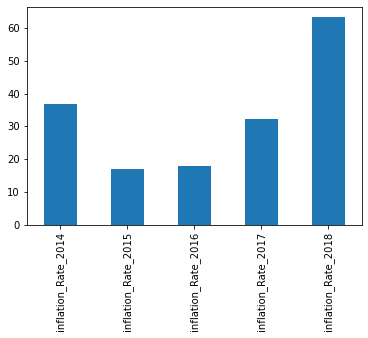

In [169]:
Inflation_columns.loc['Sudan'].plot(kind='bar', color="C0") # Taux d'inflation en fonction du temps pour Soudan

<AxesSubplot:>

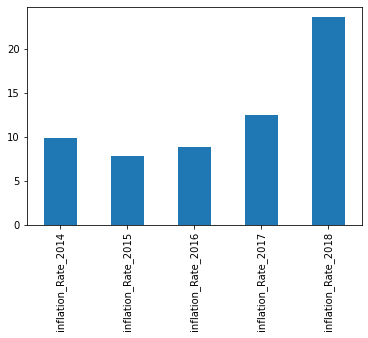

In [170]:
Inflation_columns.loc['Liberia'].plot(kind='bar', color="C0") # Taux d'inflation en fonction du temps pour Libéria

<AxesSubplot:>

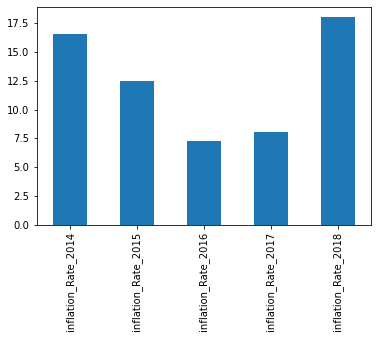

In [171]:
Inflation_columns.loc['Iran'].plot(kind='bar', color="C0") # Taux d'inflation en fonction du temps pour Iran

<AxesSubplot:>

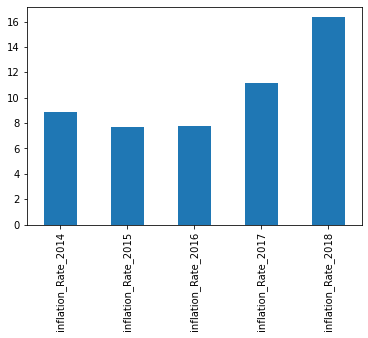

In [172]:
Inflation_columns.loc['Turkey'].plot(kind='bar', color="C0") # Taux d'inflation en fonction du temps pour la Turquie 

<AxesSubplot:>

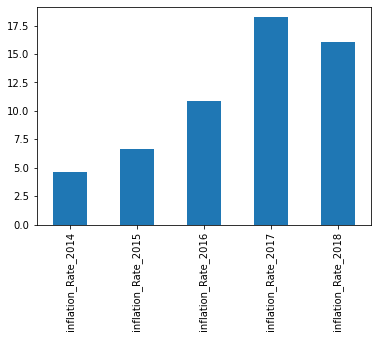

In [173]:
Inflation_columns.loc['Sierra Leone'].plot(kind='bar', color="C0") # Taux d'inflation en fonction du temps pour Sierra Leone

#Question 7: Calculer le ratio du montant des richesses issues des produits manufacturés sur le GDP des pays pour chaque année

In [174]:
Manuf2014 = Tab_manufacturing[['country', 'manufacturing_2014']] #Récupération de la data de manufacturing  en 2014
Manuf2014

,country,manufacturing_2014
1,China,3184235114106
2,United States,2042339457000
3,Japan,957049502679
4,Germany,785499345003
5,South Korea,401396044373
...,...,...
186,Canada,170003760518
187,Sint Maarten (Dutch Part),9776536
188,Venezuela,58236959836
189,Burundi,273939176


In [175]:
Ratio_richesse_14 =DD ['manufacturing_2014'] / DD['GDP_2014']*100 
Ratio_richesse_14

0       9.923827
1      22.916711
2      19.315577
3      19.816988
4      10.043011
         ...    
201          NaN
202          inf
203          NaN
204          inf
205          NaN
Length: 206, dtype: float64

In [176]:
Ratio_richesse_15 =DD ['manufacturing_2015'] / DD['GDP_2015']*100 
Ratio_richesse_15

0      10.855234
1      26.014605
2      18.771751
3      18.544586
4      10.215577
         ...    
201          NaN
202          inf
203          NaN
204          NaN
205          NaN
Length: 206, dtype: float64

In [177]:
Ratio_richesse_16 =DD ['manufacturing_2016'] / DD['GDP_2016']*100 
Ratio_richesse_16

0      11.198838
1      28.069442
2      20.728849
3      20.661873
4       9.098016
         ...    
201          NaN
202          NaN
203          NaN
204          NaN
205          NaN
Length: 206, dtype: float64

In [178]:
Ratio_richesse_17 =DD ['manufacturing_2017'] / DD['GDP_2017']*100 
Ratio_richesse_17

0      11.961293
1      31.282454
2      23.048578
3      22.406575
4       8.175704
         ...    
201          NaN
202     0.000000
203          NaN
204          NaN
205          NaN
Length: 206, dtype: float64

In [179]:
Ratio_richesse_18 =DD ['manufacturing_2018'] / DD['GDP_2018']*100 
Ratio_richesse_18

0      13.220490
1      36.927976
2      21.193392
3      20.493722
4       8.253349
         ...    
201          NaN
202     0.000000
203          NaN
204     0.000000
205          NaN
Length: 206, dtype: float64

In [180]:
Tab_manufacturing 

,country,manufacturing_2014,manufacturing_2015,manufacturing_2016,manufacturing_2017,manufacturing_2018
1,China,3184235114106,3202504408572,3153118068886,3460325198695,3868457703815
2,United States,2042339457000,2118871486000,2095858073000,2179910378000,2317176890000
3,Japan,957049502679,913595688636,1020385521042,1011711724282,1027967141296
4,Germany,785499345003,682923395869,716450036038,752017462365,795959796744
5,South Korea,401396044373,389984153400,395395892604,437574429997,459473148569
...,...,...,...,...,...,...
186,Canada,170003760518,155230495398,151724049480,0,0
187,Sint Maarten (Dutch Part),9776536,9664804,8770950,7765363,0
188,Venezuela,58236959836,0,0,0,0
189,Burundi,273939176,269320543,277073197,0,0


In [181]:
Ration_richesse_16 = DD['manufacturing_2016'] / DD['GDP_2016']*100 
Ration_richesse_16

0      11.198838
1      28.069442
2      20.728849
3      20.661873
4       9.098016
         ...    
201          NaN
202          NaN
203          NaN
204          NaN
205          NaN
Length: 206, dtype: float64

In [182]:
Ration_richesse_17 = DD['manufacturing_2017'] / DD['GDP_2017']*100 
Ration_richesse_17 

0      11.961293
1      31.282454
2      23.048578
3      22.406575
4       8.175704
         ...    
201          NaN
202     0.000000
203          NaN
204          NaN
205          NaN
Length: 206, dtype: float64

In [183]:
Ration_richesse_18 = DD['manufacturing_2018'] / DD['GDP_2018']*100 
Ration_richesse_18

0      13.220490
1      36.927976
2      21.193392
3      20.493722
4       8.253349
         ...    
201          NaN
202     0.000000
203          NaN
204     0.000000
205          NaN
Length: 206, dtype: float64

#Question 8: le Calcule le taux de croissance du GDP per capital pour chaque année (4 colonnes en sortie) 

In [184]:
previous = 'GDP_par_Cap2014'
for DD_col in ['GDP_par_Cap2015', 'GDP_par_Cap2016', 'GDP_par_Cap2017', 'GDP_par_Cap2018']:
    cr_DD_col = ((GDP_par_Capital[DD_col]- GDP_par_Capital[previous])/ GDP_par_Capital[previous]) * 100
    GDP_par_Capital['cr_' + DD_col] = cr_DD_col
    previous = DD_col 

<ipython-input-184-c18112ee2a4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_par_Capital['cr_' + DD_col] = cr_DD_col


In [185]:
GDP_par_Capital.sort_values(by=['cr_GDP_par_Cap2018'], ascending=False) 

,country,GDP_par_Cap2014,GDP_par_Cap2015,GDP_par_Cap2016,GDP_par_Cap2017,GDP_par_Cap2018,cr_GDP_par_Cap2015,cr_GDP_par_Cap2016,cr_GDP_par_Cap2017,cr_GDP_par_Cap2018
96,Libya,6467,4338,4035,5757,7877,-32.920983,-6.984786,42.676580,36.824735
125,Moldova,3329,2732,2880,3510,4234,-17.933313,5.417277,21.875000,20.626781
195,"Congo, Dem. Rep.",487,497,471,467,557,2.053388,-5.231388,-0.849257,19.271949
149,"Congo, Rep.",3754,2461,2075,2191,2578,-34.443261,-15.684681,5.590361,17.663168
147,Ukraine,3105,2125,2188,2641,3097,-31.561997,2.964706,20.703839,17.266187
...,...,...,...,...,...,...,...,...,...,...
193,Sudan,1710,1910,1299,1112,624,11.695906,-31.989529,-14.395689,-43.884892
203,Aruba,26648,27981,28281,29008,0,5.002252,1.072156,2.570630,-100.000000
205,Virgin Islands (U.S.),33573,34797,35932,35938,0,3.645787,3.261775,0.016698,-100.000000
204,Venezuela,16054,0,0,0,0,-100.000000,NaN,NaN,NaN


In [186]:
tx_Cr2015 = (GDP['GDP_par_Cap2015'] - GDP['GDP_par_Cap2014']) / GDP['GDP_par_Cap2014'] * 100 
tx_Cr2015

country
United States              3.221647
China                      5.052741
Japan                     -9.407227
Germany                  -14.330692
United Kingdom            -5.168051
                            ...    
Tuvalu                    -5.913504
South Sudan              -15.343915
Aruba                      5.002252
Venezuela               -100.000000
Virgin Islands (U.S.)      3.645787
Length: 206, dtype: float64

In [187]:
tx_Cr2016 = (GDP['GDP_par_Cap2016'] - GDP['GDP_par_Cap2015']) / GDP['GDP_par_Cap2015'] * 100
tx_Cr2016

country
United States              1.958163
China                      1.004091
Japan                     12.275518
Germany                    2.484971
United Kingdom            -8.695942
                            ...    
Tuvalu                     1.813634
South Sudan             -100.000000
Aruba                      1.072156
Venezuela                       NaN
Virgin Islands (U.S.)      3.261775
Length: 206, dtype: float64

In [188]:
tx_Cr2017 = (GDP['GDP_par_Cap2017'] - GDP['GDP_par_Cap2016']) / GDP['GDP_par_Cap2016'] * 100
tx_Cr2017

country
United States            3.640944
China                    8.971527
Japan                   -0.967442
Germany                  5.806498
United Kingdom          -1.711962
                           ...   
Tuvalu                   9.705160
South Sudan                   NaN
Aruba                    2.570630
Venezuela                     NaN
Virgin Islands (U.S.)    0.016698
Length: 206, dtype: float64

In [189]:
tx_Cr2018 = (GDP['GDP_par_Cap2018'] - GDP['GDP_par_Cap2017']) / GDP['GDP_par_Cap2017'] * 100
tx_Cr2018

country
United States              4.884952
China                     12.366257
Japan                      2.011098
Germany                    7.312639
United Kingdom             6.645029
                            ...    
Tuvalu                     3.611422
South Sudan                     NaN
Aruba                   -100.000000
Venezuela                       NaN
Virgin Islands (U.S.)   -100.000000
Length: 206, dtype: float64

#trier par l'année le taux de croissance 2017 - 2018

In [190]:
tx_Cr2018.sort_values(ascending=False)  

country
Libya                     36.824735
Moldova                   20.626781
Congo, Dem. Rep.          19.271949
Congo, Rep.               17.663168
Ukraine                   17.266187
                            ...    
Sudan                    -43.884892
Aruba                   -100.000000
Virgin Islands (U.S.)   -100.000000
South Sudan                     NaN
Venezuela                       NaN
Length: 206, dtype: float64

#Question 9: Afficher le taux d'inflation moyen par année 

In [191]:
inflation_2014 = DD["inflation_Rate_2014"].mean()  #taux d'inflation moyen en 2015 est de 4%
inflation_2014

4.003854748603351

In [192]:
inflation_2015 = DD["inflation_Rate_2015"].mean() #taux d'inflation moyen en 2015 est de 3,67%
inflation_2015

3.6692178770949724

In [193]:
inflation_2016 = DD["inflation_Rate_2016"].mean() #taux d'inflation moyen en 2016 est de 6,69%
inflation_2016

6.693407821229051

In [194]:
inflation_2017 = DD["inflation_Rate_2017"].mean() #taux d'inflation moyen en 2017 est de 4,72%
inflation_2017

4.720223463687152

In [195]:
inflation_2018 = DD["inflation_Rate_2018"].mean() #taux d'inflation moyen en 2018 est de 3,48% 
inflation_2018

3.4788268156424595